In [1]:
import numpy as np
import pandas as pd
import warnings
%matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# import glob
# import json
# import tldextract   # Accurately separates a URL's subdomain, domain, and public suffix
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
import re
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,classification_report,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# import nltk 
# import copy
# from nltk.stem import PorterStemmer
# from nltk.corpus import stopwords,wordnet
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer,LancasterStemmer
from sklearn.metrics import f1_score
from pprint import pprint
import warnings
import pickle
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', 1000)

In [2]:
isot_full_df = pd.read_csv("Updated//ISOT_Combined_textCleaned_Data.csv")
isot_full_df = isot_full_df[isot_full_df['cleaned_fulltext'].notna()]
isot_full_df=isot_full_df.iloc[0:3000]
isot_full_df.shape

(3000, 3)

In [3]:
# filename = 'outputs//isot_ml_tfidf//isot_ml_RF_tfidf.sav'

# rf_clf_tuned = pickle.load(open(filename, 'rb'))

In [4]:
# X=isot_full_df['cleaned_fulltext']
# y=isot_full_df['class']

X_train, X_test = train_test_split(isot_full_df, test_size=0.2,stratify=isot_full_df['class'], random_state=0)


In [5]:
X_train_sampled=X_train.iloc[0:1000]
X_test_sampled=X_test.iloc[0:500]
X_train_sampled=X_train.copy()
#X_test_sampled=X_test.copy()

In [6]:
train_X=X_train_sampled['cleaned_fulltext']
train_y=X_train_sampled['class']
test_X=X_test_sampled['cleaned_fulltext']
test_y=X_test_sampled['class']

In [7]:
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(train_X).toarray()
X_test_tfidf = tfidf.transform(test_X).toarray()

In [8]:
X_test_tfidf.shape

(500, 1000)

In [9]:
from tqdm import tqdm

In [10]:
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_tfidf,train_y)

pred = rf_clf.predict(X_test_tfidf)
print("Accuracy score : {}".format(accuracy_score(test_y, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(test_y, pred)))
print("Classification Report")
print(classification_report(test_y, pred))
precision = precision_score(test_y, pred)
print("Precision : {}".format(precision))
recall = recall_score(test_y, pred)
print("Recall : {}".format(recall))
f1score = f1_score(test_y, pred)
print("F1 Score : {}".format(f1score))

Accuracy score : 0.946
Confusion matrix : 
 [[232   8]
 [ 19 241]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       240
           1       0.97      0.93      0.95       260

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

Precision : 0.9678714859437751
Recall : 0.926923076923077
F1 Score : 0.9469548133595286


In [11]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [12]:
feature_names = tfidf.get_feature_names_out()

In [13]:
len(feature_names)

1000

In [14]:
# explainerModel = shap.TreeExplainer(rf_clf)
# shap_values_Model = explainerModel.shap_values(S)

In [15]:
# explainerModel = shap.TreeExplainer(rf_clf)

In [16]:
# a=X_test.iloc[[0]]

In [17]:
# X_test_tfidf = tfidf.transform(test_X)

In [18]:
# # Calculate Shap values
# choosen_instance = X_test.iloc[[0]]
# shap_values = explainerModel.shap_values(choosen_instance)
# #shap.force_plot(explainerModel.expected_value[1], shap_values[1], choosen_instance)

In [19]:
X_test_tfidf.shape

(500, 1000)

In [20]:
feature_names = tfidf.get_feature_names_out()
explainer = shap.Explainer(rf_clf, X_train_tfidf, feature_names=feature_names)

In [21]:
shap_values = explainer(X_test_tfidf)
print(shap_values.values.shape) # (5000, 16438, 2)

(500, 1000, 2)


In [22]:
import copy

In [23]:
X_test_tfidf.shape

(500, 1000)

In [24]:
#X_test_sample2=X_test_sample.copy()
X_test_sample_v2 = X_test_sampled.copy(deep=True)

In [25]:
X_test_sample_v2=X_test_sample_v2.reset_index()

In [26]:
X_test_sample_v2.head(2)

,index,class,fulltext,cleaned_fulltext
0,1270,0,"Juncker blasts Britain for 'huge' unanswered Brexit questions EU chief executive Jean-Claude Juncker blasted Britain s failure to answer huge numbers of questions on its Brexit plans as negotiators held a new round of talks on Tuesday on a divorce due in less than two years. Hours after his chief negotiator Michel Barnier urged his British counterpart to start negotiating seriously when they met in Brussels on Monday, European Commission President Juncker echoed the bloc s refusal to discuss the future free trade deal London wants before penciling in terms for leaving the EU. Juncker scoffed at a raft of British negotiating papers published over the summer which Prime Minister Theresa May s government said had shown London was responding seriously to the detailed proposals agreed by the other 27 EU states. I would like to be clear that I did read with the requisite attention all the papers produced by Her Majesty s government; I find none of them truly satisfactory, he told E...",juncker blast britain huge unanswered brexit question chief executive jean claude juncker blasted britain failure answer huge number question brexit plan negotiator held new round talk tuesday divorce year hour chief negotiator michel barnier urged british counterpart start negotiating seriously met brussels monday european commission president juncker echoed bloc refusal discus future free trade deal london want penciling term leaving juncker scoffed raft british negotiating paper published summer prime minister theresa government said shown london responding seriously detailed proposal agreed state clear read requisite attention paper produced majesty government truly satisfactory told european union envoy gathered brussels annual conference huge number question need settled included issue right citizen britain briton europe brexit border stretch island ireland said need crystal clear begin negotiation new economic trade relationship question resolved divorce juncker said mix iss...
1,1706,0,"Under Armour-sponsored athletes oppose CEO's pro-Trump comments Professional ballet dancer Misty Copeland and wrestler turned-actor Dwayne “The Rock” Johnson joined National Basketball Association star Stephen Curry in opposing comments made by the chief executive of their sponsor Under Armour supporting U.S. President Donald Trump. On Tuesday, Plank expressed support for Trump on CNBC, saying: “To have such a pro-business president is something that is a real asset for the country.” On Thursday, Copeland wrote on her Instagram page (@mistyonpointe) that she strongly disagrees with Plank’s recent comments in support of Trump. Johnson on Twitter (@TheRock) also posted that Plank’s words on CNBC were neither his words or his beliefs. But he added that his disagreement does not mean he will be abandoning Under Armour, with which he currently has a shoe line. Copeland and Johnson join a number of athletes including Curry to speak out against Trump. In an interview with The San Jose Me...",armour sponsored athlete oppose ceo pro trump comment professional ballet dancer misty copeland wrestler turned actor dwayne rock johnson joined national basketball association star stephen curry opposing comment chief executive sponsor armour supporting president donald trump tuesday plank expressed support trump cnbc saying pro business president real asset country thursday copeland wrote instagram page mistyonpointe strongly disagrees plank recent comment support trump johnson twitter therock posted plank word cnbc word belief added disagreement mean abandoning armour currently shoe line copeland johnson join number athlete including curry speak trump interview san jose mercury news wednesday curry armour visible athlete said agree description asset plank remove number nba player including cleveland cavalier superstar lebron james endorsed nike recently expressed concern trump policy curry player directly oppose comment sponsor p

In [27]:
X_test[X_test['class']==0].index

Int64Index([1270, 1706, 1887, 2356,  194,  727, 1687,  301,  660, 1798,
            ...
            1158,  213,  686,  472,  264, 2476,  362,  784, 2602,  334], dtype='int64', length=294)

In [28]:
X_test[X_test['class']==1].index

Int64Index([ 912, 2157, 2066,  388,  110, 2694, 1119, 2683,  917, 2754,
            ...
            1799, 1109, 1810, 2217, 1019,  305, 1193, 1289, 2417,  765], dtype='int64', length=306)

In [29]:
#X_test[X_test['class']==0].head(100)

In [30]:
X_test_sample_v2.shape

(500, 4)

In [31]:
len(X_test_tfidf)

500

In [43]:
X_test_sample_v2[X_test_sample_v2['index']==727]

,index,class,fulltext,cleaned_fulltext
10,727,0,"ASPIRATIONS: Young Chinese seize the day, seize the hour The world is this generation s oyster. China s Class of 2012 is mostly ambitious and pragmatic. What do they want out of life? For some, it's a husband. For others, an apartment in a city. Still others are happy with a stable job, or travel and new experiences. Wang Siyue, a product specialist at an internet education company: To be honest, how can I imagine what will happen in the next five years? You can make some plans but the world is unpredictable ... There s a very good saying: the luck of man is in balance. It s balanced. If you have good luck in the beginning, you ll have less luck later on. I believe in fate. Hu Ruixin, a computer technician, talked about his dreams when he was in university: I had a 15-year-plan for myself. For the first five years, I d open an advertising studio. In the next five years, I d let the studio develop into a company. With five more years, I d grow the company. But when I fina...",aspiration young chinese seize day seize hour world generation oyster china class ambitious pragmatic want life husband apartment city happy stable job travel new experience wang siyue product specialist internet education company honest imagine happen year plan world unpredictable good saying luck man balance balanced good luck beginning luck later believe fate ruixin technician talked dream university year plan year open advertising studio year let studio develop company year grow company finally graduated university went world hard realize restriction difficult gave important thing life responsibility got child parent feel responsibility important zhang weixuan assistant secretary software company recently managed beijing residency coveted hukou china dream simple hope establish big city year got beijing hukou successfully got want married start family work field hope year time buy small apartment establish think pretty good jing township leader communist party youth league grew...


aspiration young chinese seize day seize hour world generation oyster china class ambitious pragmatic want life husband apartment city happy stable job travel new experience wang siyue product specialist internet education company honest imagine happen year plan world unpredictable good saying luck man balance balanced good luck beginning luck later believe fate ruixin technician talked dream university year plan year open advertising studio year let studio develop company year grow company finally graduated university went world hard realize restriction difficult gave important thing life responsibility got child parent feel responsibility important zhang weixuan assistant secretary software company recently managed beijing residency coveted hukou china dream simple hope establish big city year got beijing hukou successfully got want married start family work field hope year time buy small apartment establish think pretty good jing township leader communist party youth league grew wuh

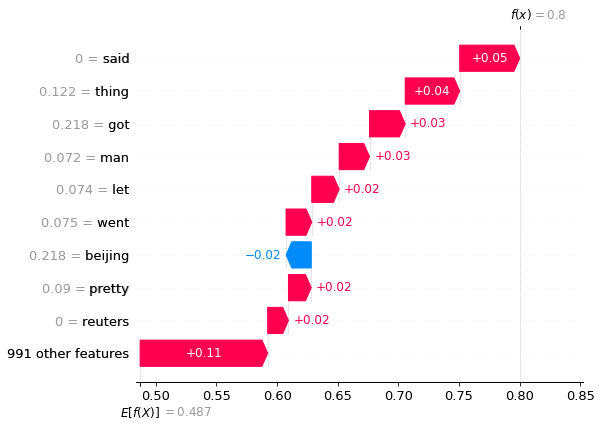

In [44]:
ind=10
print(X_test_sample_v2['cleaned_fulltext'].iloc[ind])
shap.plots.waterfall(shap_values[ind,:,1])

In [460]:
shap.plots.force(shap_values[ind,:,1])

In [378]:
len(pred)

500

In [45]:
#combining predictions with truth class labels in test_filtered dataframe
X_test_sample_v2.insert(len(X_test_sample_v2.columns),'pred',pred)
X_test_sample_v2.head(2)

,index,class,fulltext,cleaned_fulltext,pred
0,1270,0,"Juncker blasts Britain for 'huge' unanswered Brexit questions EU chief executive Jean-Claude Juncker blasted Britain s failure to answer huge numbers of questions on its Brexit plans as negotiators held a new round of talks on Tuesday on a divorce due in less than two years. Hours after his chief negotiator Michel Barnier urged his British counterpart to start negotiating seriously when they met in Brussels on Monday, European Commission President Juncker echoed the bloc s refusal to discuss the future free trade deal London wants before penciling in terms for leaving the EU. Juncker scoffed at a raft of British negotiating papers published over the summer which Prime Minister Theresa May s government said had shown London was responding seriously to the detailed proposals agreed by the other 27 EU states. I would like to be clear that I did read with the requisite attention all the papers produced by Her Majesty s government; I find none of them truly satisfactory, he told E...",juncker blast britain huge unanswered brexit question chief executive jean claude juncker blasted britain failure answer huge number question brexit plan negotiator held new round talk tuesday divorce year hour chief negotiator michel barnier urged british counterpart start negotiating seriously met brussels monday european commission president juncker echoed bloc refusal discus future free trade deal london want penciling term leaving juncker scoffed raft british negotiating paper published summer prime minister theresa government said shown london responding seriously detailed proposal agreed state clear read requisite attention paper produced majesty government truly satisfactory told european union envoy gathered brussels annual conference huge number question need settled included issue right citizen britain briton europe brexit border stretch island ireland said need crystal clear begin negotiation new economic trade relationship question resolved divorce juncker said mix iss...,0
1,1706,0,"Under Armour-sponsored athletes oppose CEO's pro-Trump comments Professional ballet dancer Misty Copeland and wrestler turned-actor Dwayne “The Rock” Johnson joined National Basketball Association star Stephen Curry in opposing comments made by the chief executive of their sponsor Under Armour supporting U.S. President Donald Trump. On Tuesday, Plank expressed support for Trump on CNBC, saying: “To have such a pro-business president is something that is a real asset for the country.” On Thursday, Copeland wrote on her Instagram page (@mistyonpointe) that she strongly disagrees with Plank’s recent comments in support of Trump. Johnson on Twitter (@TheRock) also posted that Plank’s words on CNBC were neither his words or his beliefs. But he added that his disagreement does not mean he will be abandoning Under Armour, with which he currently has a shoe line. Copeland and Johnson join a number of athletes including Curry to speak out against Trump. In an interview with The San Jose Me...",armour sponsored athlete oppose ceo pro trump comment professional ballet dancer misty copeland wrestler turned actor dwayne rock johnson joined national basketball association star stephen curry opposing comment chief executive sponsor armour supporting president donald trump tuesday plank expressed support trump cnbc saying pro business president real asset country thursday copeland wrote instagram page mistyonpointe strongly disagrees plank recent comment support trump johnson twitter therock posted plank word cnbc word belief added disagreement mean abandoning armour currently shoe line copeland johnson join number athlete including curry speak trump interview san jose mercury news wednesday curry armour visible athlete said agree description asset plank remove number nba player including cleveland cavalier superstar lebron james endorsed nike recently expressed concern trump policy curry player directly oppose comment sp

In [46]:
#misclassified samples
misclassified_df = X_test_sample_v2.loc[X_test_sample_v2[X_test_sample_v2['class']!=X_test_sample_v2['pred']].index, :]  # works
misclassified_df.shape

(27, 5)

In [47]:
misclassified_df=misclassified_df[['index','fulltext','class','pred']]

In [63]:
misclassified_df.head(50)

,index,fulltext,class,pred
10,727,"ASPIRATIONS: Young Chinese seize the day, seize the hour The world is this generation s oyster. China s Class of 2012 is mostly ambitious and pragmatic. What do they want out of life? For some, it's a husband. For others, an apartment in a city. Still others are happy with a stable job, or travel and new experiences. Wang Siyue, a product specialist at an internet education company: To be honest, how can I imagine what will happen in the next five years? You can make some plans but the world is unpredictable ... There s a very good saying: the luck of man is in balance. It s balanced. If you have good luck in the beginning, you ll have less luck later on. I believe in fate. Hu Ruixin, a computer technician, talked about his dreams when he was in university: I had a 15-year-plan for myself. For the first five years, I d open an advertising studio. In the next five years, I d let the studio develop into a company. With five more years, I d grow the company. But when I fina...",0,1
23,2357,"THEIR EVIL KNOWS NO BOUNDS: TALIBAN EXECUTES 5 “SAVE THE CHILDREN WORKERS” AS ISIS KIDNAPS 120 SCHOOLCHILDREN TO BE TRAINED AS TERRORISTS The Taliban or ISIS? Does it really matter? Radical islam is just evil and knows no bounds.Killing aid workers is as low as they could go except now they ve brought it down to the kid level Five aid workers who d been kidnapped were found murdered:The bodies of five Afghan aid workers working for Save the Children were found on Friday, 39 days after their abduction by the Taliban in the central province of Uruzgan, a spokesman for provincial governor Dost Mohammad Nayab said.ISIS KIDNAPS 120 CHILDREN:The Islamic State group has abducted 120 schoolchildren in the embattled Iraqi city of Mosul, it was reported Sunday, and has transported the kids to an unknown locationAccording to Iraqi sources quoted by the German DPA wire service, the children, aged 12-15, were reportedly snatched from their classrooms and loaded on military vehicles by the Islam...",1,0
25,1902,"VOTING MACHINES STOLEN In Controversial GA Election Where Dems Hope To Embarrass Trump With 30-Yr Old Jon Ossoff Win SANDY SPRINGS, Ga., April 18 (Reuters) For U.S. President Donald Trump, an off-year congressional election on Tuesday in the reliably Republican northern suburbs of Atlanta could spell trouble if Democratic upstart Jon Ossoff pulls off a surprise victory.Watch MSNBC Morning Joe show hosts and guest attempt to contain their excitement over the possibility of a Democrat winning the seat of former House Leader Newt Gingrich and now, in a special election they are hoping to replace Tom Price s Georgia s 6th District seat:Donald Trump is actively campaigning against Ossoff on social media:Republicans must get out today and VOTE in Georgia 6. Force runoff and easy win! Dem Ossoff will raise your taxes-very bad on crime & 2nd A. Donald J. Trump (@realDonaldTrump) April 18, 2017A 30-year-old political novice, Ossoff is running as the lone Democrat against a field of 17 Re...",1,0
32,2561,"BREAKING: U.S. SUPREME COURT JUSTICE ANTONIN SCALIA Found Dead In TX Antonin Scalia was one of our most reliable, conservative US Supreme Court Justices. Pray for our nation Conservative U.S. Supreme Court Justice Antonin Scalia has died, setting up a major political showdown between President Barack Obama and the Republican-controlled Senate over who will replace him just months before a presidential election. On behalf of the court and retired justices, I am saddened to report that our colleague Justice Antonin Scalia has passed away, Chief Justice John Roberts said in a statement on Saturday, calling Scalia, 79, an extraordinary individual and jurist. Scalia s death was first reported by the San Antonio News-Express, who said he had apparently died of natural causes while visiting a luxury resort in West Texas.Appointed to the top U.S. court in 1986 by President Ronald Reagan, Scalia was known for his strident conservati

In [58]:
misclassified_df[['fulltext','class','pred']][misclassified_df['index']==1902]

,fulltext,class,pred
25,"VOTING MACHINES STOLEN In Controversial GA Election Where Dems Hope To Embarrass Trump With 30-Yr Old Jon Ossoff Win SANDY SPRINGS, Ga., April 18 (Reuters) For U.S. President Donald Trump, an off-year congressional election on Tuesday in the reliably Republican northern suburbs of Atlanta could spell trouble if Democratic upstart Jon Ossoff pulls off a surprise victory.Watch MSNBC Morning Joe show hosts and guest attempt to contain their excitement over the possibility of a Democrat winning the seat of former House Leader Newt Gingrich and now, in a special election they are hoping to replace Tom Price s Georgia s 6th District seat:Donald Trump is actively campaigning against Ossoff on social media:Republicans must get out today and VOTE in Georgia 6. Force runoff and easy win! Dem Ossoff will raise your taxes-very bad on crime & 2nd A. Donald J. Trump (@realDonaldTrump) April 18, 2017A 30-year-old political novice, Ossoff is running as the lone Democrat against a field of 17 Re...",1,0


In [59]:
test_X.loc[1902]  # For verification of correctindex for shap with original frame

'voting machine stolen controversial election dems hope embarrass trump old jon ossoff win sandy spring april reuters president donald trump year congressional election tuesday reliably republican northern suburb atlanta spell trouble democratic upstart jon ossoff pull surprise victory watch msnbc morning joe host guest attempt contain excitement possibility democrat winning seat house leader newt gingrich special election hoping replace tom price georgia district seat donald trump actively campaigning ossoff social medium republican today vote georgia force runoff easy win dem ossoff raise tax bad crime donald trump realdonaldtrump april year old political novice ossoff running lone democrat field republican seat house representative vacated trump named tom price secretary health human service outcome tip balance power republican controlled house ossoff win weaken trump shaky hold fellow republican house encouraging competitive district distance president democrat fight life pulling s

In [51]:
misclassified_df.shape

(27, 4)

VOTING MACHINES STOLEN In Controversial GA Election Where Dems Hope To Embarrass Trump With 30-Yr Old Jon Ossoff Win SANDY SPRINGS, Ga., April 18 (Reuters)   For U.S. President Donald Trump, an off-year congressional election on Tuesday in the reliably Republican northern suburbs of Atlanta could spell trouble if Democratic upstart Jon Ossoff pulls off a surprise victory.Watch MSNBC Morning Joe show hosts and guest attempt to contain their excitement over the possibility of a Democrat winning the seat of former House Leader Newt Gingrich and now, in a special election they are hoping to replace Tom Price s Georgia s 6th District seat:Donald Trump is actively campaigning against Ossoff on social media:Republicans must get out today and VOTE in Georgia 6. Force runoff and easy win! Dem Ossoff will raise your taxes-very bad on crime & 2nd A.  Donald J. Trump (@realDonaldTrump) April 18, 2017A 30-year-old political novice, Ossoff is running as the lone Democrat against a field of 17 Republ

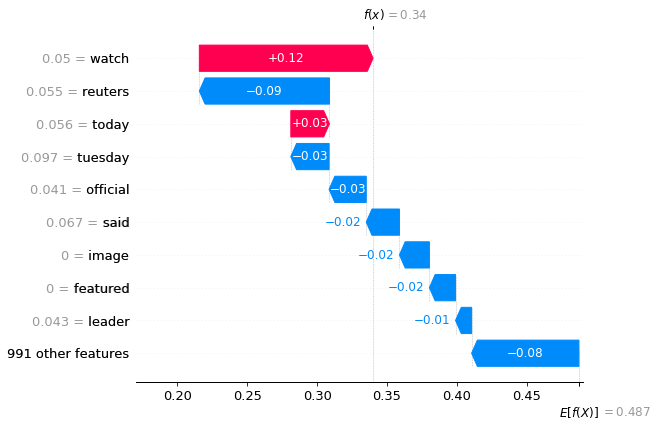

In [71]:
ind=25
print(misclassified_df['fulltext'].loc[ind])
shap.plots.waterfall(shap_values[ind,:,1])

In [60]:
shap.plots.force(shap_values[ind,:,1])